# Feature Extraction/Data Cleaning

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
df_Y = pd.read_csv("hvbp_tps_11_07_2017.csv",encoding='ansi')
df_Y.columns = df_Y.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_Y.head()

,provider_number,hospital_name,address,city,state,zip_code,county_name,unweighted_normalized_clinical_care_domain_score,weighted_normalized_clinical_care_domain_score,unweighted_patient_and_caregiver_centered_experience_of_care/care_coordination_domain_score,weighted_patient_and_caregiver_centered_experience_of_care/care_coordination_domain_score,unweighted_normalized_safety_domain_score,weighted_safety_domain_score,unweighted_normalized_efficiency_and_cost_reduction_domain_score,weighted_efficiency_and_cost_reduction_domain_score,total_performance_score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,43.333333333333,10.833333333333,26.000000000000,6.500000000000,72.857142857143,18.214285714286,0.000000000000,0.000000000000,35.547619047619
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,16.666666666667,4.166666666667,36.000000000000,9.000000000000,81.428571428571,20.357142857143,0.000000000000,0.000000000000,33.523809523810
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,26.666666666667,6.666666666667,17.000000000000,4.250000000000,47.142857142857,11.785714285714,0.000000000000,0.000000000000,22.702380952381
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,26.666666666667,8.888888888889,56.000000000000,18.666666666667,Not Available,Not Available,0.000000000000,0.000000000000,27.555555555556
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,46.666666666667,11.666666666667,25.000000000000,6.250000000000,42.857142857143,10.714285714286,0.000000000000,0.000000000000,28.630952380952


In [3]:
df_Y = pd.DataFrame({'id': df_Y.provider_number,
                     'rating': df_Y.total_performance_score})
XY = df_Y

In [4]:
XY

,id,rating
0,10001,35.547619047619
1,10005,33.523809523810
2,10006,22.702380952381
3,10007,27.555555555556
4,10011,28.630952380952
...,...,...
2803,670096,40.000000000000
2804,670098,38.916666666667
2805,670103,40.555555555556
2806,670106,26.777777777778


In [5]:
df_Y.rating = df_Y.rating.apply(lambda x: x.strip(')').replace('(',''))
df_Y['rating'] = df_Y['rating'].astype(float)

In [6]:
for k in df_Y['id'].value_counts():
    if k!=1:
        print(k)
# All ids are unique since nothing got printed out.

# Merging - Timely and Effective Care

In [7]:
df = pd.read_csv("Timely and Effective Care - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
print(len(df.measure_id.unique()))
df.measure_id.unique()

21


array(['ED_1b', 'ED_2b', 'EDV', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_1',
       'OP_18b', 'OP_2', 'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_29',
       'OP_30', 'OP_31', 'OP_33', 'OP_3b', 'OP_4', 'OP_5', 'PC_01',
       'VTE_6'], dtype=object)

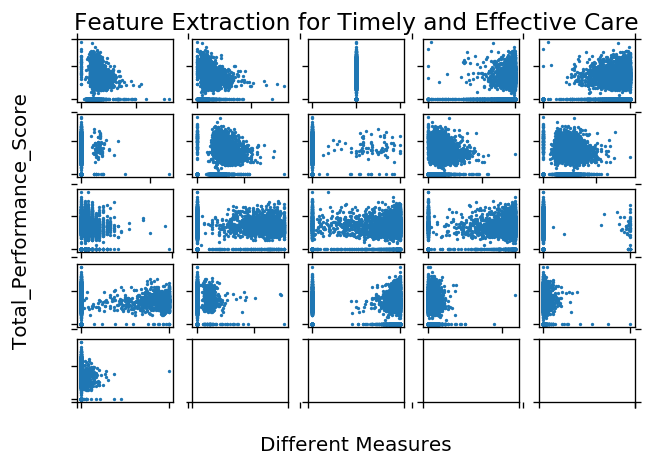

In [9]:
# Set our inline image resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

# Get the subplot sizes
num_measure = len(df.measure_id.unique())
maxCol = int(math.sqrt(num_measure))+1

# Set the subplot matrix to be maxRow x maxRow dimension
fig, axs = plt.subplots(maxCol,maxCol)
colcnt = 0
rowcnt = 0

cnt = 1
for k in df.measure_id.unique():
    dfTemp = df[df.measure_id==k]
    # Remove non-numeric rows in score column
    dfTemp = dfTemp[dfTemp.score.apply(lambda x: x.isnumeric())]
    dfTemp.score
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_id,'score_care_'+str(cnt):dfTemp.score.astype('int64')})
    # merge X and Y
    # how = 'outer' makes non-matching rows of id just null, so we swap with 0
    XY = pd.merge(left=XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    XY = XY.fillna(0)
    
    # plot as subplot
    axs[rowcnt,colcnt].plot(XY['score_care_'+str(cnt)],
                            XY.rating, lineStyle='none',
                            marker='o',
                            markersize=1)
    axs[colcnt,rowcnt].set_yticklabels([]) # get rid of numbers in axes
    axs[colcnt,rowcnt].set_xticklabels([]) 
    cnt = cnt + 1
    colcnt = colcnt + 1
    if colcnt == maxCol:
        rowcnt = rowcnt + 1
        colcnt = 0

# get rid of numbers in axes
for ax in axs:
    for i in ax:
        i.set_xticklabels([]) 
        i.set_yticklabels([])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes (outer labels)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.title("Feature Extraction for Timely and Effective Care", fontsize=14)
plt.xlabel("Different Measures",fontsize=12)
plt.ylabel("Total_Performance_Score", fontsize=12)

# store in fullset
full_XY = XY.copy()

In [10]:
full_XY = full_XY.drop('score_care_3',axis=1)
full_XY = full_XY.drop('score_care_6',axis=1)
full_XY = full_XY.drop('score_care_8',axis=1)
full_XY = full_XY.drop('score_care_15',axis=1)
full_XY = full_XY.drop('score_care_21',axis=1)

In [11]:
full_XY

,id,rating,score_care_1,score_care_2,score_care_4,score_care_5,score_care_7,score_care_9,score_care_10,score_care_11,score_care_12,score_care_13,score_care_14,score_care_16,score_care_17,score_care_18,score_care_19,score_care_20
0,10001,35.547619,255.0,84.0,92.0,86.0,165.0,40.0,80.0,6.0,0.0,47.0,92.0,0.0,0.0,0.0,0.0,0.0
1,10005,33.523810,246.0,76.0,98.0,80.0,114.0,22.0,69.0,2.0,82.0,79.0,97.0,100.0,0.0,99.0,14.0,3.0
2,10006,22.702381,220.0,64.0,99.0,89.0,136.0,11.0,68.0,2.0,0.0,68.0,83.0,0.0,0.0,0.0,0.0,0.0
3,10007,27.555556,138.0,70.0,99.0,54.0,117.0,39.0,79.0,4.0,0.0,100.0,0.0,0.0,0.0,100.0,6.0,0.0
4,10011,28.630952,290.0,66.0,78.0,73.0,148.0,52.0,91.0,3.0,0.0,89.0,100.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,61320,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,11.0,0.0
4473,141328,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0
4474,251315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,4.0,0.0
4475,351324,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,6.0,0.0


# Merging - Medicare Spending per Patient
Too little data. Hard to use.

In [12]:
df = pd.read_csv("Medicare Hospital Spending per Patient - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [13]:
df = df[df.score.apply(lambda x: x.isnumeric())]

In [14]:
df = pd.DataFrame({'id':df.provider_id,'score_medicare':df.score.astype('int64')})

In [15]:
df

,id,score_medicare
1,10005,1
2,10006,1
33,10059,1
42,10085,1
43,10086,1
...,...,...
4530,510024,1
4536,510046,1
4614,520103,1
4705,530033,1


# Merging - Outpatient Imaging Efficiency

In [16]:
df = pd.read_csv("Outpatient Imaging Efficiency - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [17]:
df = df[df.score!='Not Available']
# df['score'] = df['score'].replace('Not Available',0)

In [18]:
df.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_id,measure_name,score,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,9.0,NaN,07/01/2015,06/30/2016
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,1.5,NaN,07/01/2015,06/30/2016
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,5.9,NaN,07/01/2015,06/30/2016
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,1.6,NaN,07/01/2015,06/30/2016
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,35.1,NaN,07/01/2015,06/30/2016


In [19]:
df.measure_id.unique()

array(['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'OP_9'], dtype=object)

1


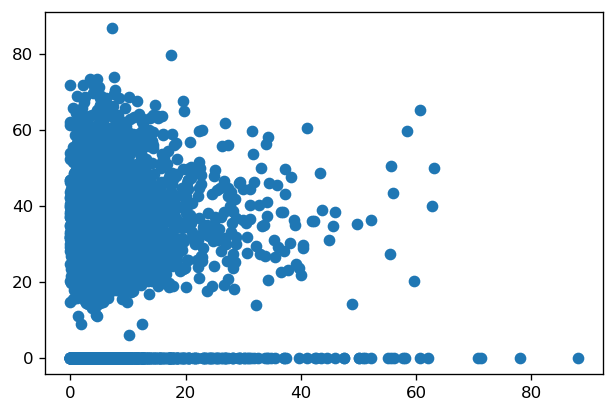

2


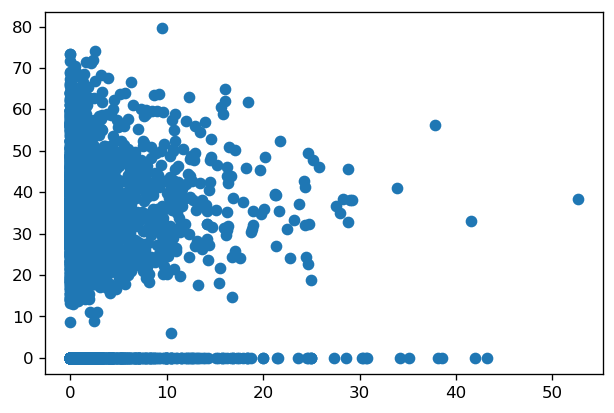

3


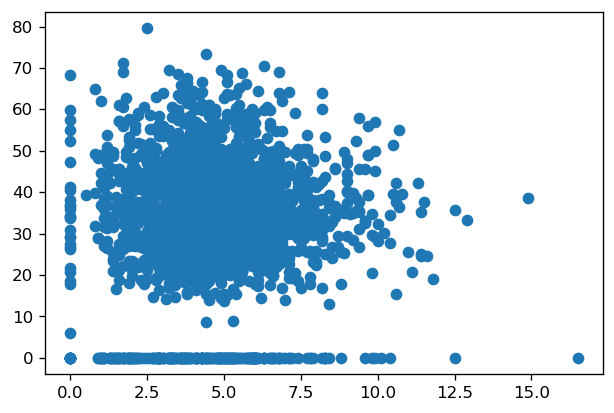

4


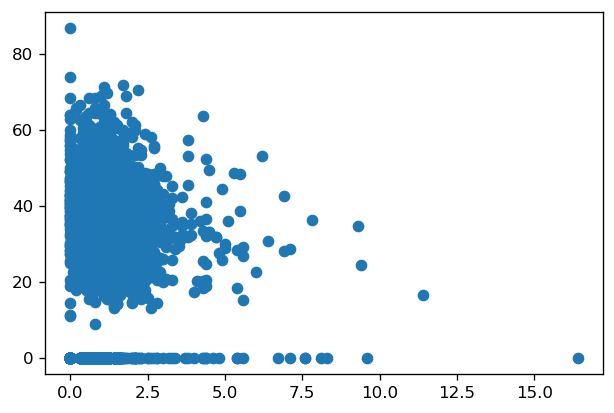

5


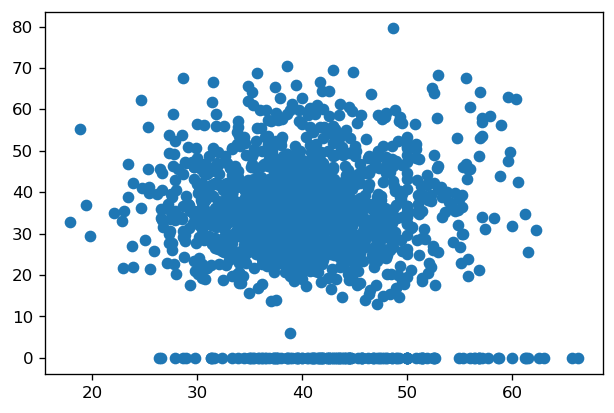

6


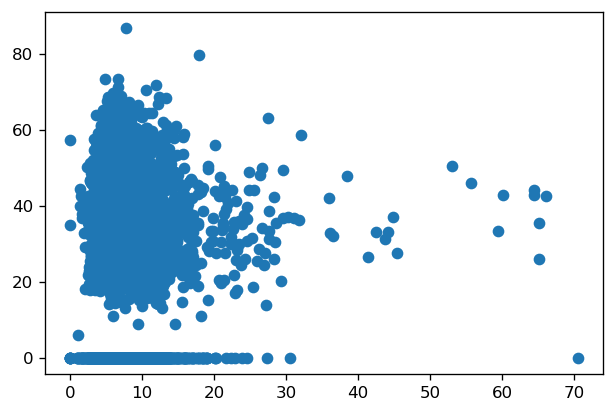

In [20]:
cnt = 1
for k in df.measure_id.unique():
    dfTemp = df[df.measure_id==k]
    dfTemp = dfTemp[dfTemp.score!='Not Available']
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_id,'score_imaging_'+str(cnt):dfTemp.score.astype('float')})
    
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    
    # plot
    print(cnt)
    plt.plot(full_XY['score_imaging_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()

    cnt = cnt + 1

In [21]:
full_XY

,id,rating,score_care_1,score_care_2,score_care_4,score_care_5,score_care_7,score_care_9,score_care_10,score_care_11,...,score_care_17,score_care_18,score_care_19,score_care_20,score_imaging_1,score_imaging_2,score_imaging_3,score_imaging_4,score_imaging_5,score_imaging_6
0,10001,35.547619,255.0,84.0,92.0,86.0,165.0,40.0,80.0,6.0,...,0.0,0.0,0.0,0.0,9.0,1.5,5.9,1.6,35.1,4.6
1,10005,33.523810,246.0,76.0,98.0,80.0,114.0,22.0,69.0,2.0,...,0.0,99.0,14.0,3.0,16.1,8.9,3.9,1.8,43.0,4.3
2,10006,22.702381,220.0,64.0,99.0,89.0,136.0,11.0,68.0,2.0,...,0.0,0.0,0.0,0.0,12.9,4.2,3.5,1.6,36.5,6.8
3,10007,27.555556,138.0,70.0,99.0,54.0,117.0,39.0,79.0,4.0,...,0.0,100.0,6.0,0.0,15.5,7.5,NaN,NaN,NaN,20.3
4,10011,28.630952,290.0,66.0,78.0,73.0,148.0,52.0,91.0,3.0,...,0.0,0.0,0.0,4.0,4.8,9.6,NaN,1.8,40.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,271346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4503,371305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4504,451351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4505,50552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3


# Merging - Payment and Value of Care - Hospital

In [22]:
df = pd.read_csv("Payment and Value of Care - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,payment_measure_name,payment_measure_id,...,payment,lower_estimate,higher_estimate,payment_footnote,value_of_care_display_name,value_of_care_display_id,value_of_care_category,value_of_care_footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$22,178","$21,108","$23,323",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2013,06/30/2016
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart failure patients,PAYM_30_HF,...,"$16,525","$15,754","$17,335",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2013,06/30/2016
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for hip/knee replacement patients,PAYM_90_HIP_KNEE,...,"$26,863","$25,762","$28,041",NaN,Value of Care hip/knee replacement measure,COMP_PAYM_90_HIP_KNEE,Worse complications and higher payment,NaN,04/01/2013,03/31/2016
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for pneumonia patients,PAYM_30_PN,...,"$17,230","$16,358","$18,106",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and average payment,NaN,07/01/2013,06/30/2016
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,...,"$22,133","$19,674","$24,909",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2013,06/30/2016


In [23]:
df = df[df.payment!='Not Available']

1


C:\Users\koole\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


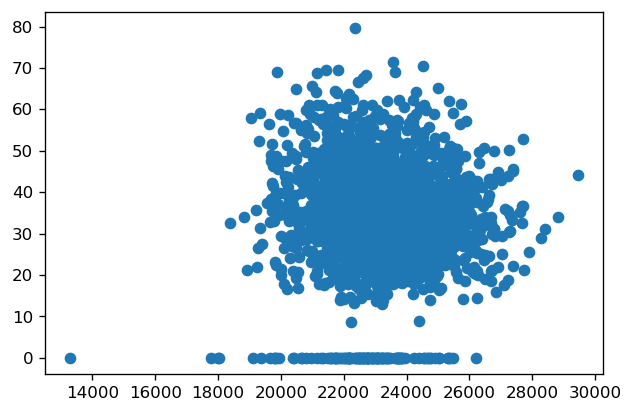

2


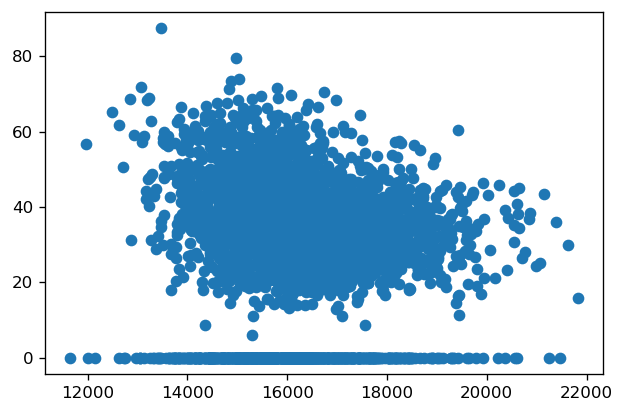

3


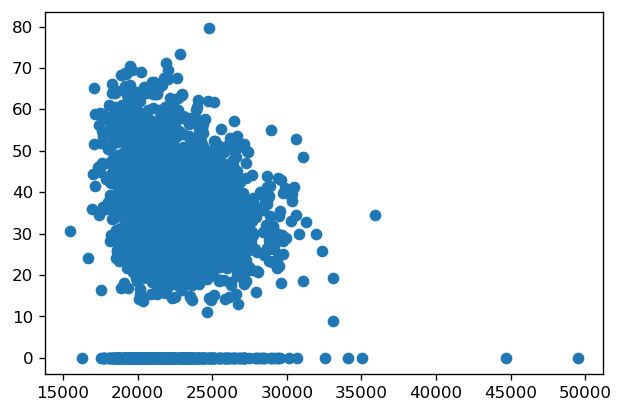

4


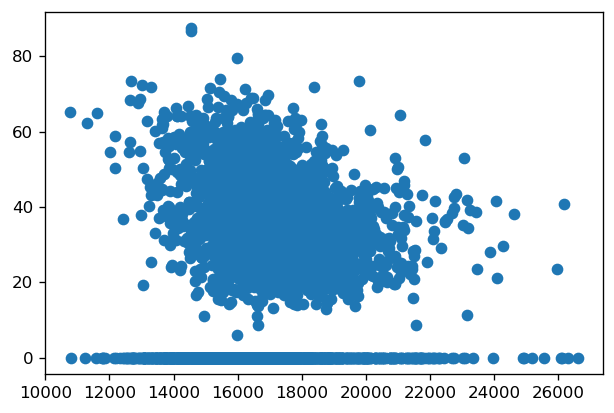

In [24]:
cnt = 1
XY = df_Y
for k in df.payment_measure_id.unique():
    dfTemp = df[df.payment_measure_id==k]
    dfTemp.payment = dfTemp.payment.apply(lambda x: x.strip('$ ').replace(',',''))
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_id,'payment_'+str(cnt):dfTemp.payment.astype('int64')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['payment_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    cnt = cnt + 1

# Merging - Complication and Deaths

In [25]:
df = pd.read_csv("Complications and Deaths - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [26]:
df.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,measure_name,measure_id,compared_to_national,denominator,score,lower_estimate,higher_estimate,footnote,measure_start_date,measure_end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,Worse than the National Rate,337,4.2,2.9,6.0,NaN,04/01/2013,03/31/2016
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,744,13.4,11.4,15.8,NaN,07/01/2013,06/30/2016
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,280,3.5,2.1,5.8,NaN,07/01/2013,06/30/2016
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,522,9.7,7.6,12.3,NaN,07/01/2013,06/30/2016
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,858,11.4,9.5,13.6,NaN,07/01/2013,06/30/2016


1


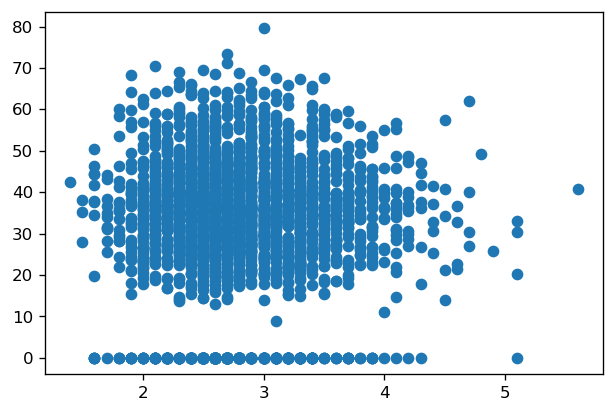

2


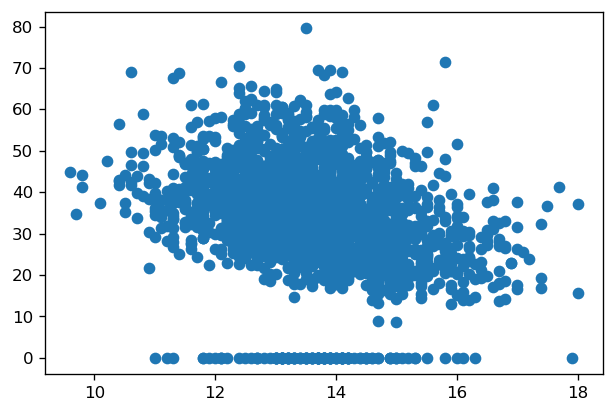

3


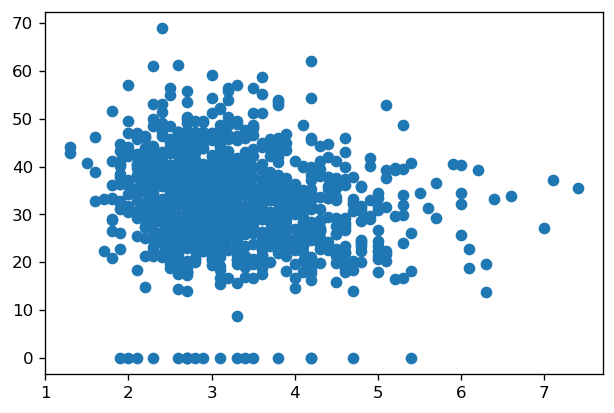

4


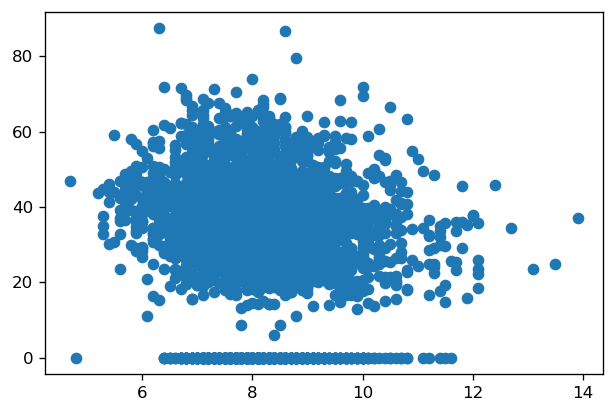

5


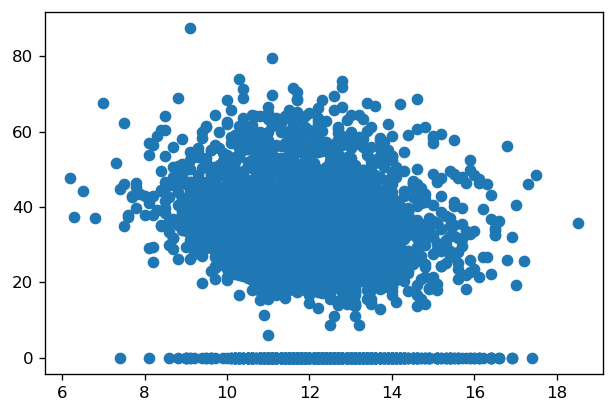

6


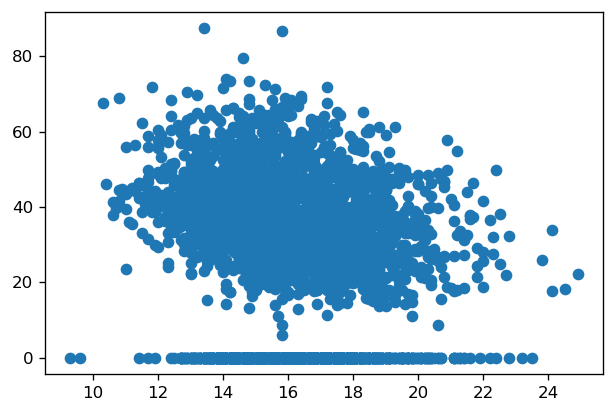

7


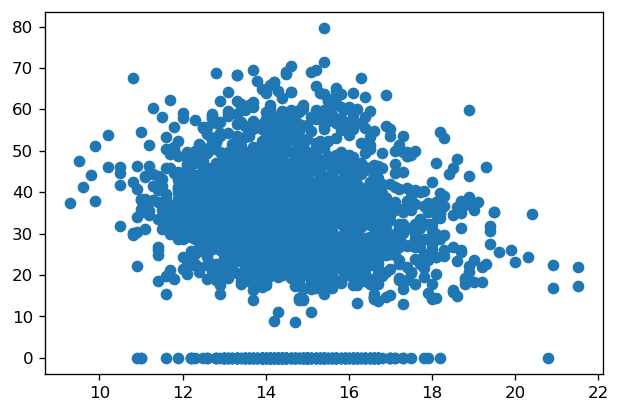

8


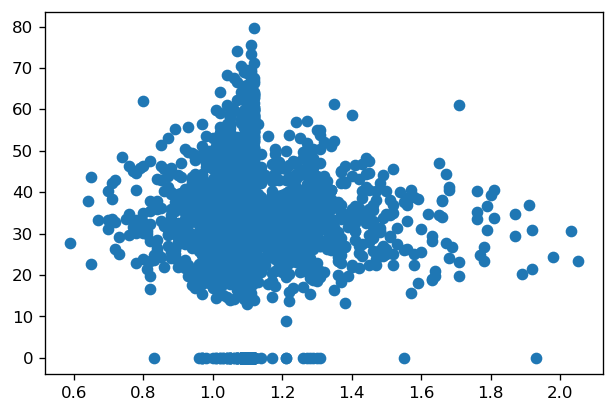

9


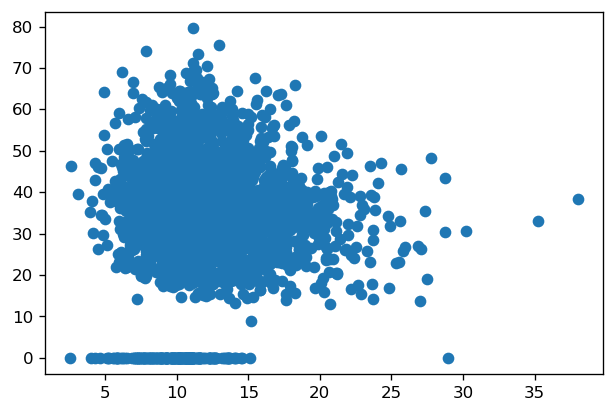

10


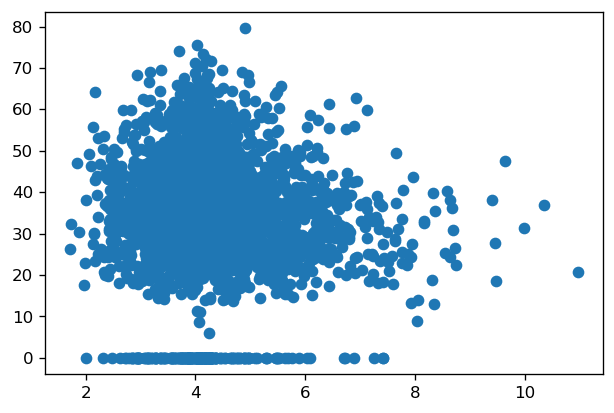

11


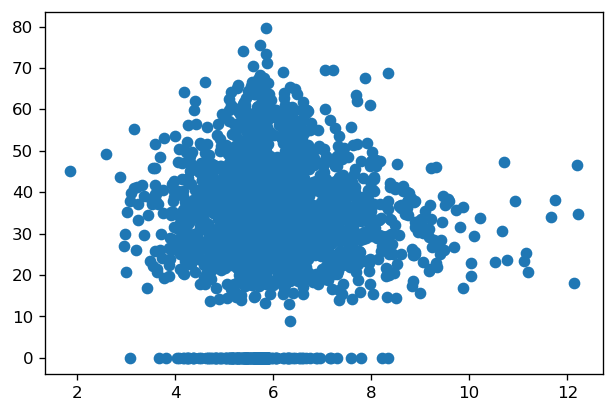

12


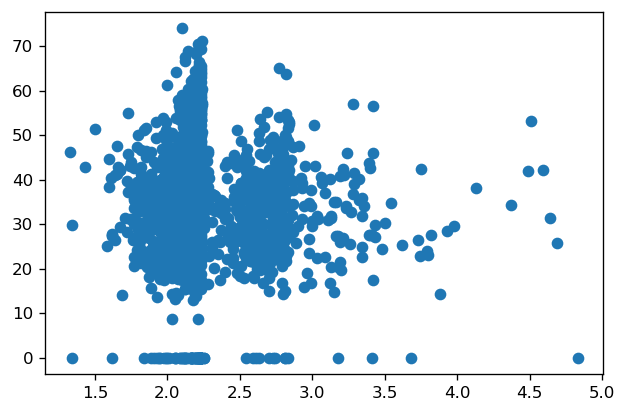

13


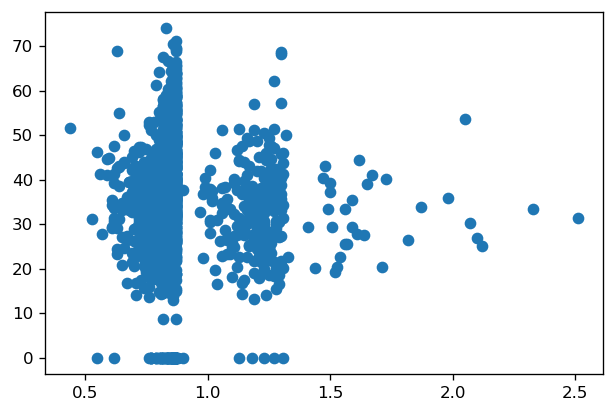

14


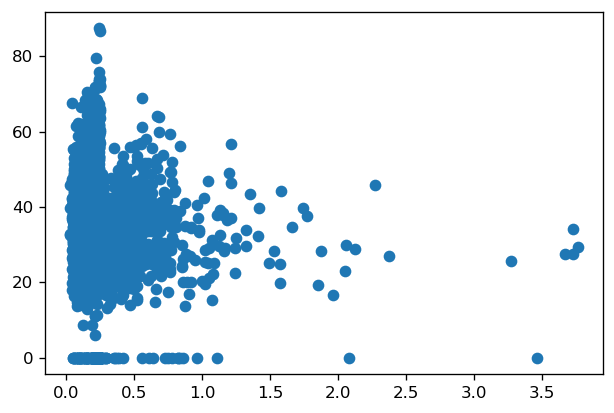

15


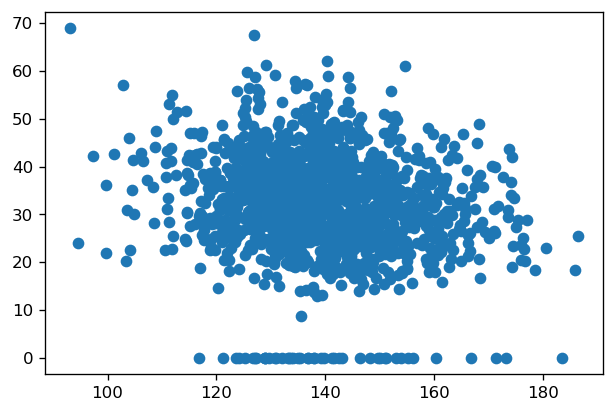

16


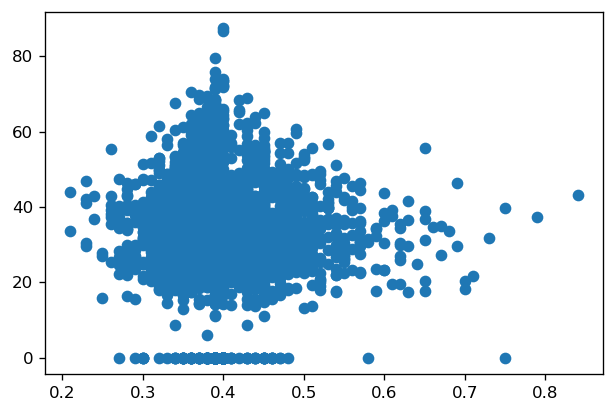

17


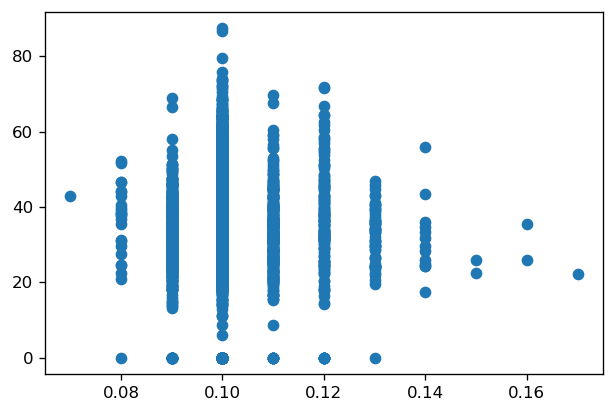

18


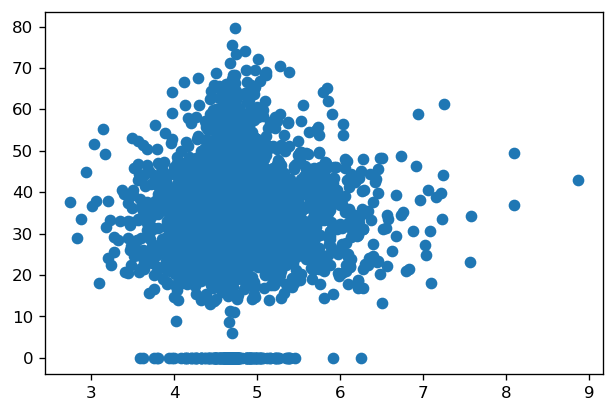

19


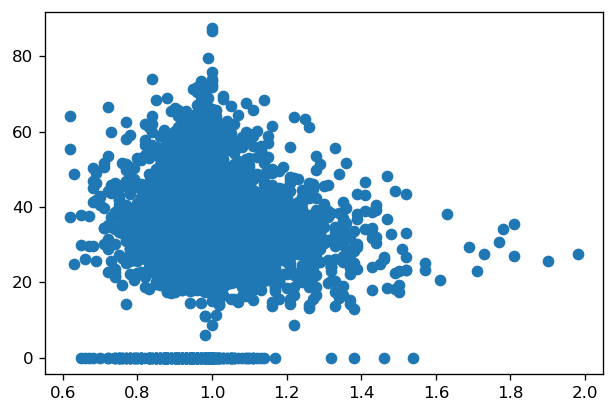

In [27]:
cnt = 1
XY = df_Y
for k in df.measure_id.unique():
    dfTemp = df[df.measure_id==k]
    dfTemp = dfTemp[dfTemp.score!='Not Available']
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_id,'score_deaths_'+str(cnt):dfTemp.score.astype('float')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['score_deaths_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    
    cnt = cnt + 1

# Merging - Ambulatory Surgical Measures
Can't seem to use it. ids and names don't match with other datasets

In [28]:
df = pd.read_csv("Ambulatory Surgical Measures-Facility.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,asc_name,provider_id,npi,city,state,zip_code,year,asc_1_measure_rate,asc_1_footnote,asc_2_measure_rate,...,asc_11_encounter_start_date,asc_11_encounter_end_date,asc_12_total_cases,asc_12_performance_category,asc_12_interval_lower_limit,asc_12_interval_upper_limit,asc_12_footnote,asc_12_encounter_start_date,asc_12_encounter_end_date,asc_12_rshv_rate
0,Roxbury Clinic and Surgery Center,05C0001658,1003001967,Beverly Hills,CA,90210.0,2016,NaN,5.0,NaN,...,01/01/2016,12/31/2016,NaN,NaN,NaN,NaN,5.0,01/01/2016,12/31/2016,NaN
1,The Surgery Center at Northbay Vaca Valley,05C0001831,1003015843,Vacaville,CA,95687.0,2016,0.735,NaN,0.735,...,01/01/2016,12/31/2016,192.0,No Different than the National Rate,10.0,19.6,NaN,01/01/2016,12/31/2016,13.9
2,Carlsbad Surgery Center,05C0001873,1003017351,Carlsbad,CA,92011.0,2016,0.000,NaN,0.000,...,01/01/2016,12/31/2016,NaN,Number of Cases Too Small,NaN,NaN,1.0,01/01/2016,12/31/2016,NaN
3,"Midwest Endoscopy Center, LLC",14C0001134,1003036310,Naperville,IL,60540.0,2016,1.029,NaN,0.000,...,01/01/2016,12/31/2016,632.0,No Different than the National Rate,9.3,17.4,NaN,01/01/2016,12/31/2016,12.7
4,York County Endoscopy Center,42C0001080,1003058744,Rock Hill,SC,29732.0,2016,0.000,1.0,0.000,...,01/01/2016,12/31/2016,NaN,Number of Cases Too Small,NaN,NaN,1.0,01/01/2016,12/31/2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,Jerry N. Black MD Surgical Suite,51C0001005,1992896310,Buckhannon,WV,26201.0,2016,0.000,NaN,0.000,...,01/01/2016,12/31/2016,NaN,NaN,NaN,NaN,5.0,01/01/2016,12/31/2016,NaN
5117,Northwest Endoscopy Center,11C0001341,1992941462,Marietta,GA,30060.0,2016,0.000,NaN,0.000,...,01/01/2016,12/31/2016,382.0,No Different than the National Rate,10.0,18.8,NaN,01/01/2016,12/31/2016,13.6
5118,Park Center for Procedures,10C0001534,1992970230,Fort Myers,FL,33919.0,2016,0.000,NaN,0.000,...,01/01/2016,12/31/2016,NaN,NaN,NaN,NaN,5.0,01/01/2016,12/31/2016,NaN
5119,Summit Ambulatory Surgical Center,21C0001152,1992992994,Baltimore,MD,21237.0,2016,0.000,NaN,0.000,...,01/01/2016,12/31/2016,NaN,NaN,NaN,NaN,5.0,01/01/2016,12/31/2016,NaN


# Merging - Readmission Reduction
Huge impact on prediction

In [29]:
df = pd.read_csv("Readmission Reduction.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

,hospital_name,provider_number,state,measure_name,number_of_discharges,footnote,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,810,,0.9875,14.9136,15.1026,120,07/01/2013,06/30/2016
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,275,,1.0499,13.3154,12.6826,38,07/01/2013,06/30/2016
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-COPD-HRRP,617,,0.9891,18.2801,18.4823,112,07/01/2013,06/30/2016
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,1053,,0.9506,20.1391,21.1865,209,07/01/2013,06/30/2016
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,342,,1.1004,5.3174,4.8322,20,07/01/2013,06/30/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
19825,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-CABG-HRRP,Not Available,5,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19826,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-COPD-HRRP,Not Available,5,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19827,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-HF-HRRP,Not Available,5,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016
19828,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,670120,TX,READM-30-HIP-KNEE-HRRP,Not Available,5,Not Available,Not Available,Not Available,Not Available,07/01/2013,06/30/2016


In [30]:
df = df[df.number_of_readmissions!='Not Available']
df = df[df.expected_readmission_rate!='Not Available']
df = df[df.excess_readmission_ratio!='Not Available']

df = df[df.number_of_readmissions!='Too Few to Report']
df = df[df.expected_readmission_rate!='Too Few to Report']
df = df[df.excess_readmission_ratio!='Too Few to Report']

1


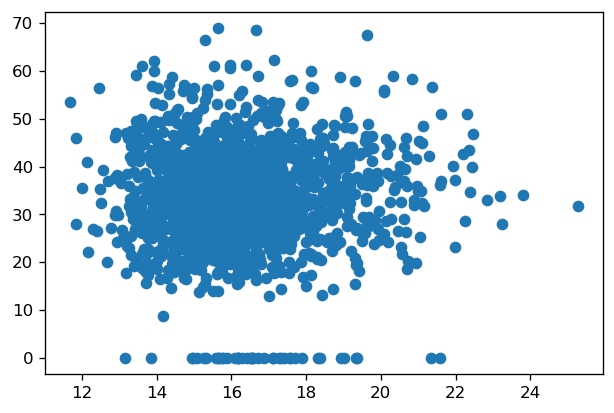

2


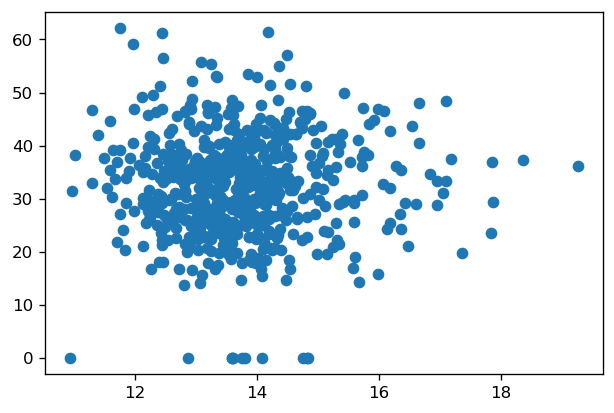

3


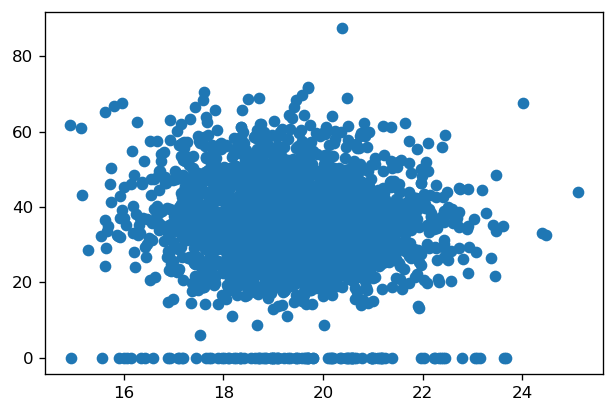

4


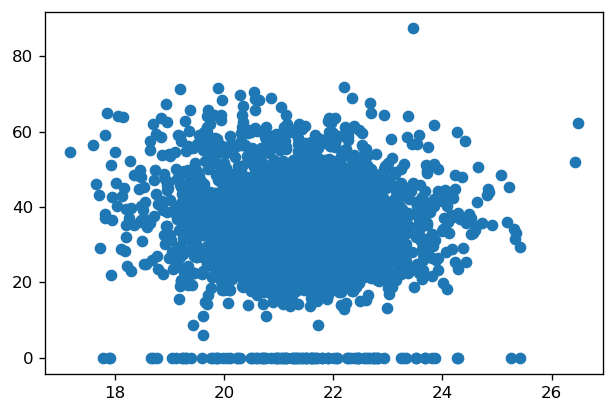

5


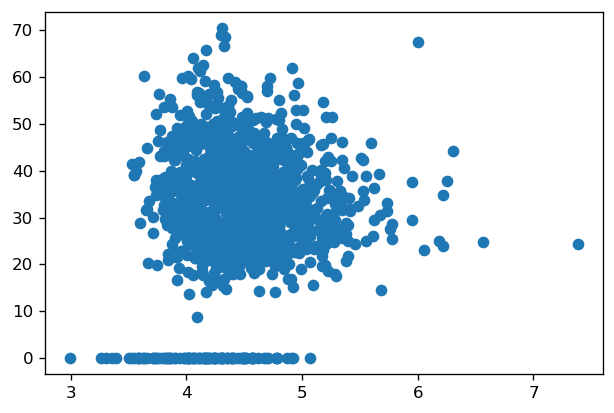

6


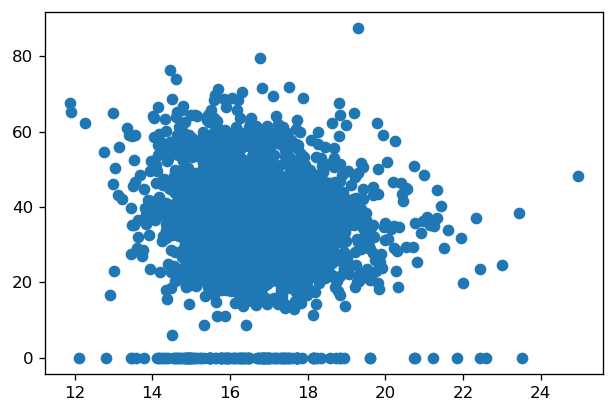

In [31]:
cnt = 1
XY = df_Y
for k in df.measure_name.unique():
    dfTemp = df[df.measure_name==k]
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_number,'expected_read_'+str(cnt):dfTemp.expected_readmission_rate.astype('float')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['expected_read_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    cnt = cnt + 1

1


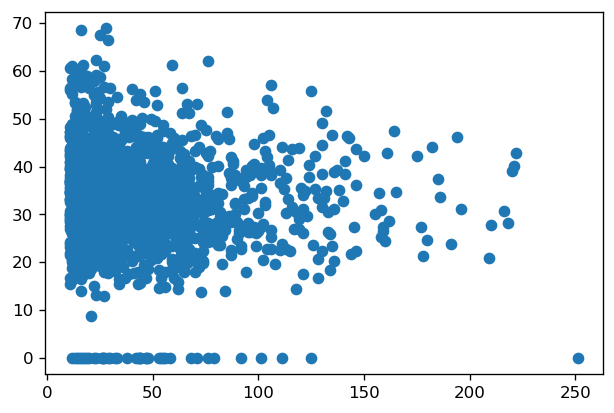

2


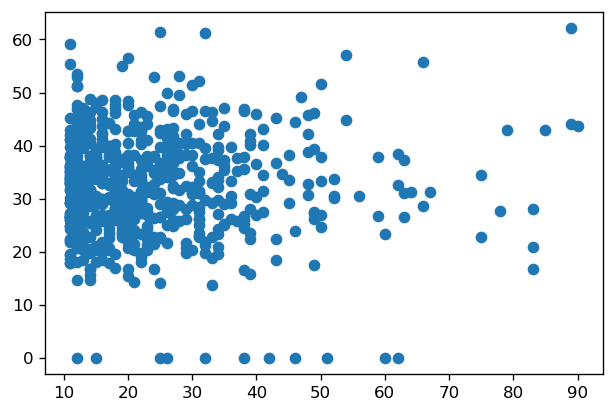

3


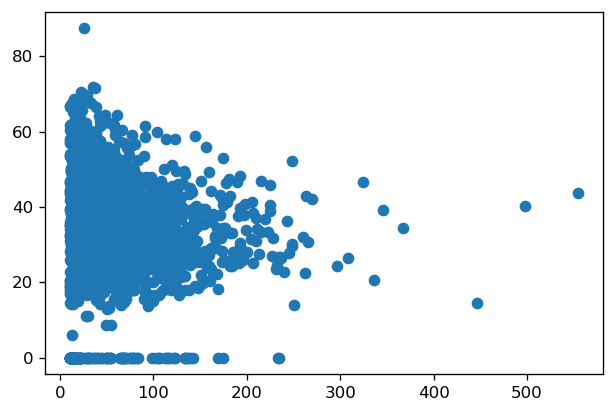

4


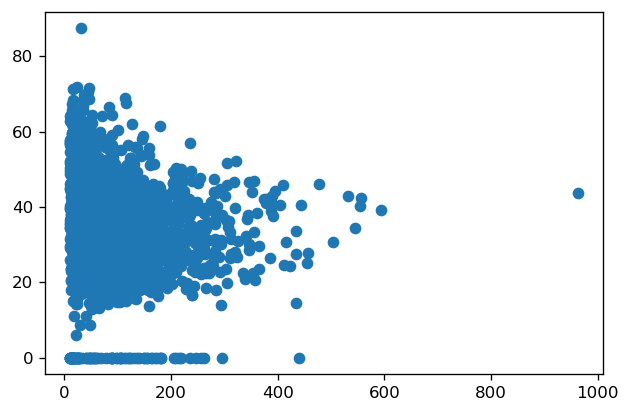

5


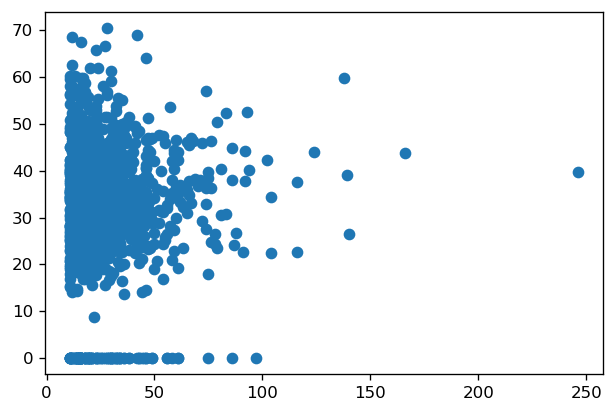

6


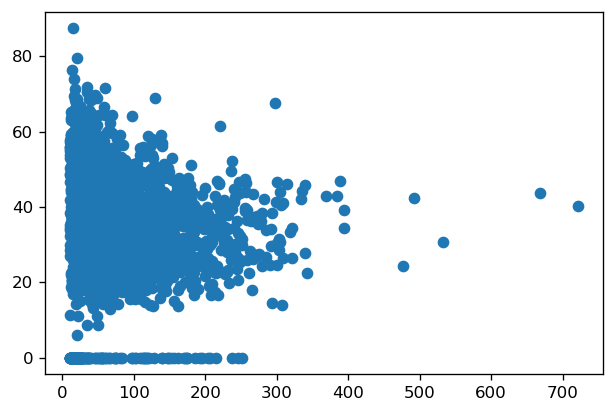

In [32]:
cnt = 1
XY = df_Y
for k in df.measure_name.unique():
    dfTemp = df[df.measure_name==k]
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_number,'num_read_'+str(cnt):dfTemp.number_of_readmissions.astype('float')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['num_read_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    cnt = cnt + 1

1


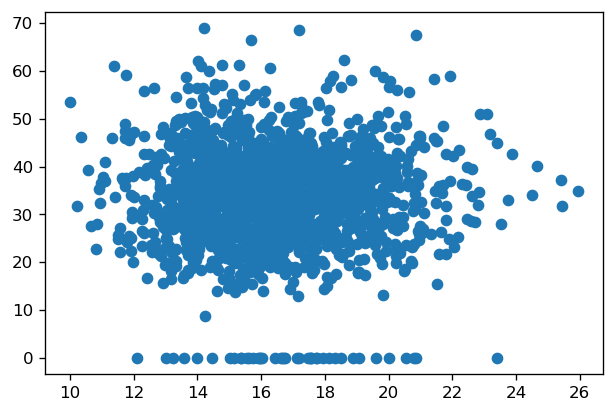

2


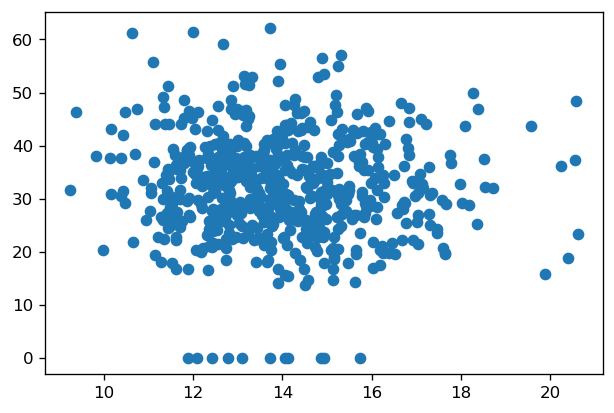

3


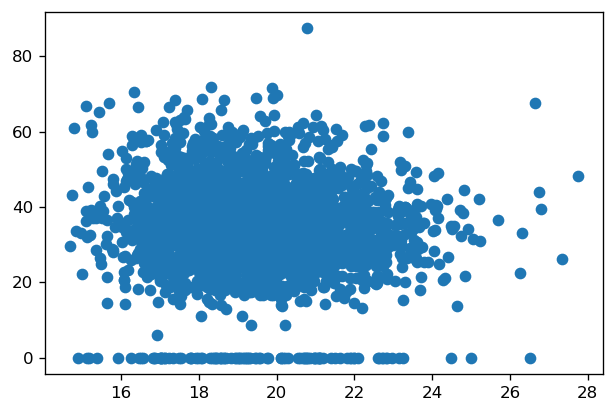

4


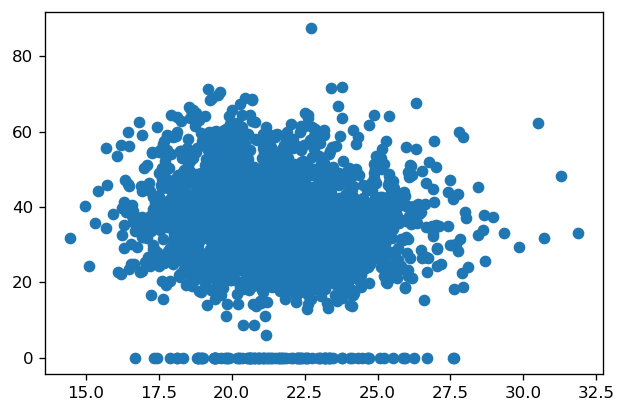

5


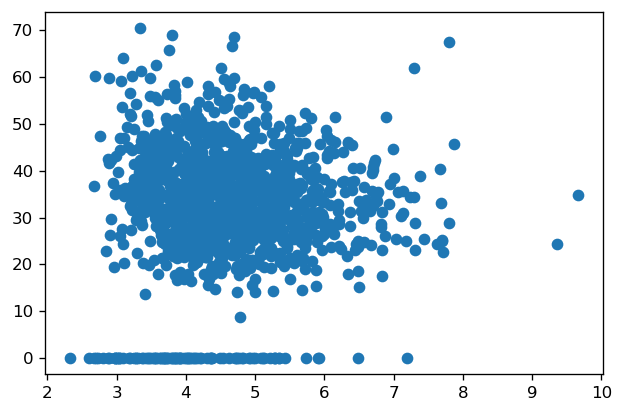

6


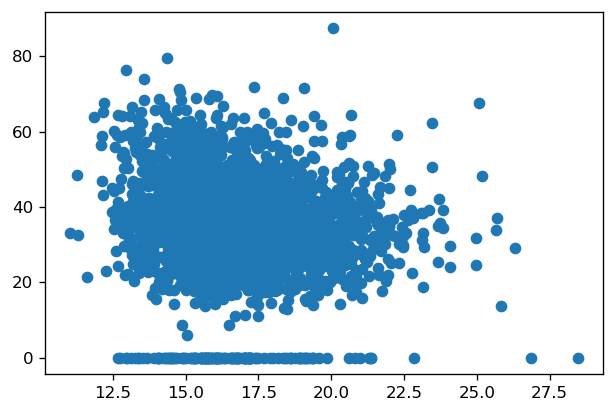

In [33]:
cnt = 1
XY = df_Y
for k in df.measure_name.unique():
    dfTemp = df[df.measure_name==k]
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_number,'pred_read_'+str(cnt):dfTemp.predicted_readmission_rate.astype('float')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['pred_read_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    cnt = cnt + 1

# Merging - Healthcare Associated Infections

In [34]:
df = pd.read_csv("Healthcare Associated Infections - Hospital.csv",encoding='ansi')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [35]:
df = df[df.score!='Not Available']

7


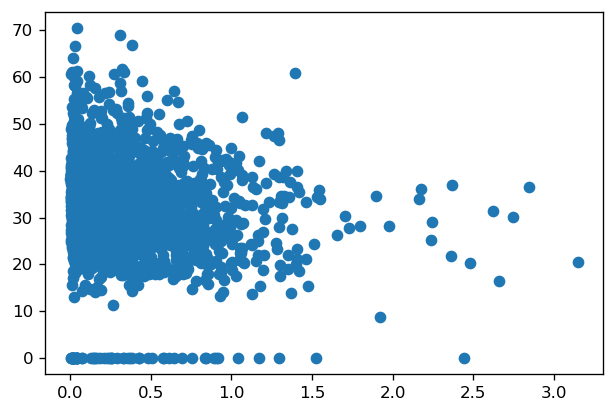

8


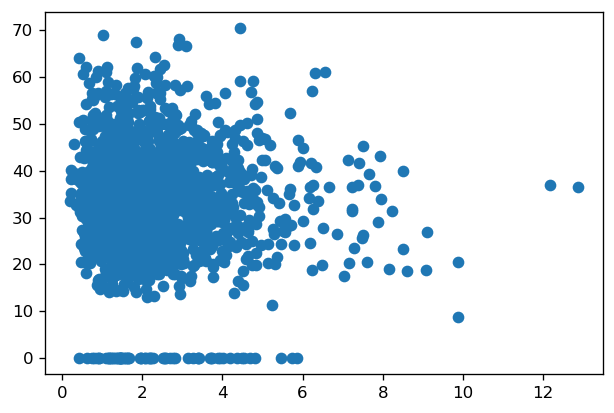

9


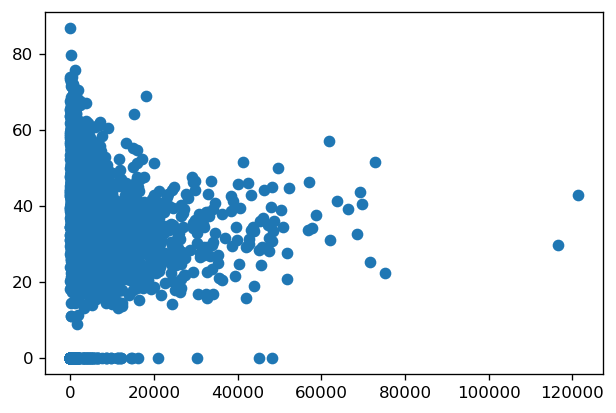

10


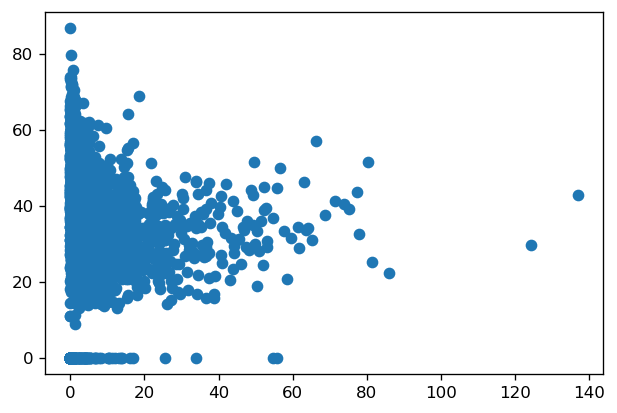

11


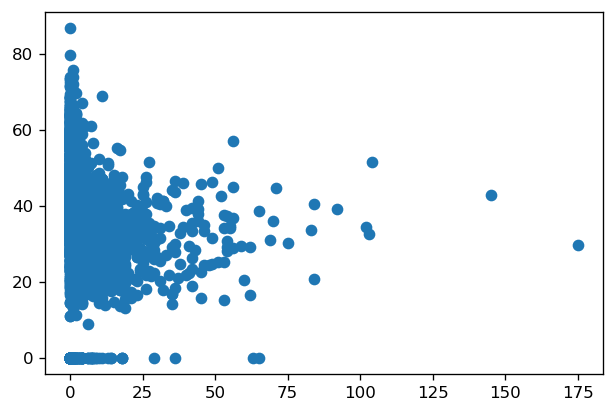

12


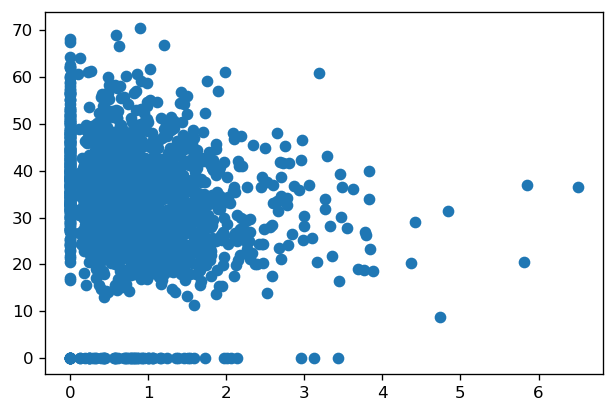

13


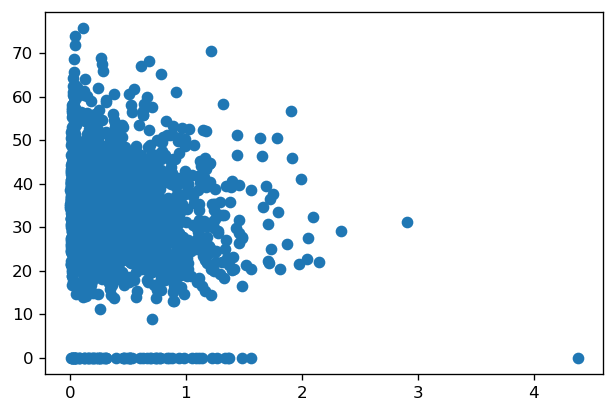

14


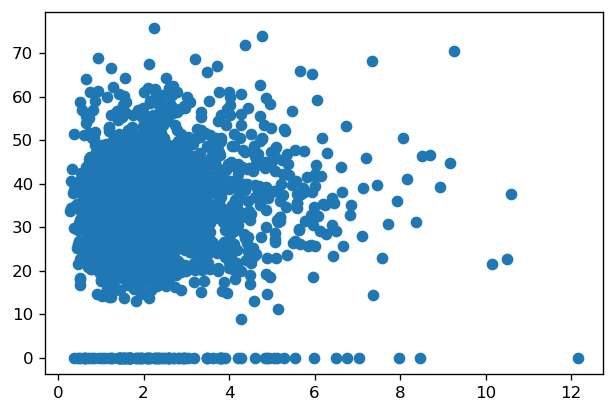

15


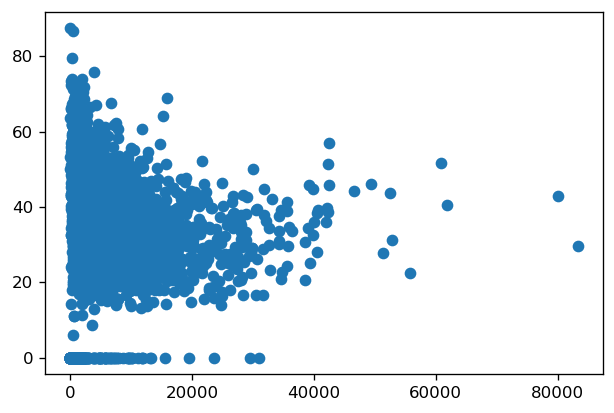

16


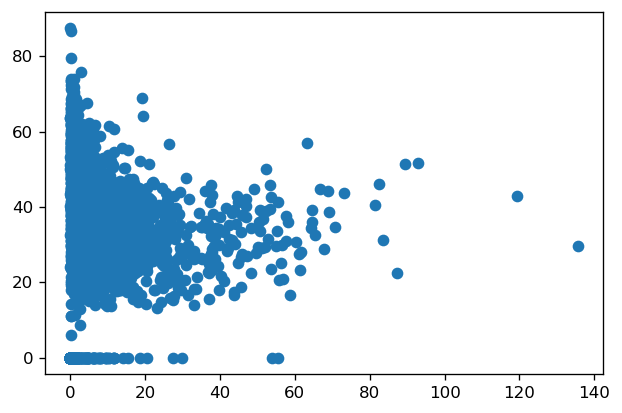

17


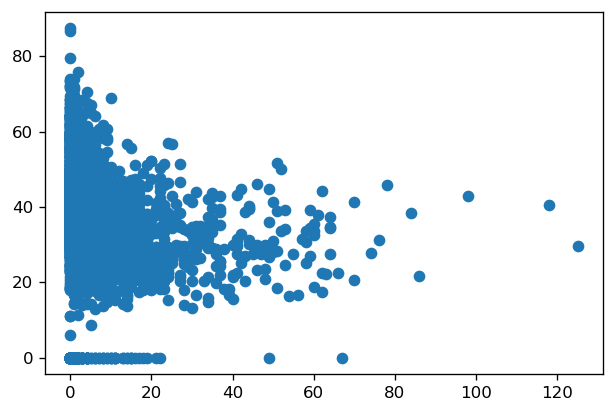

18


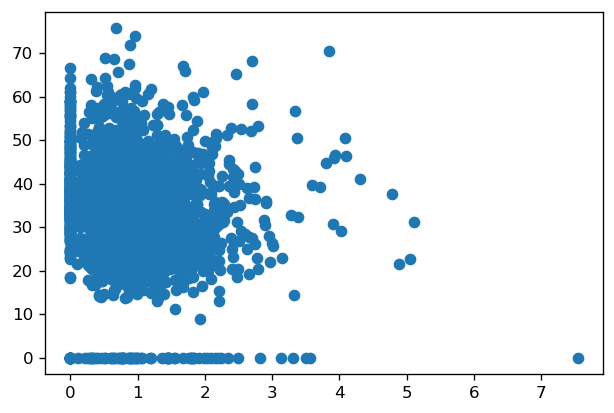

19


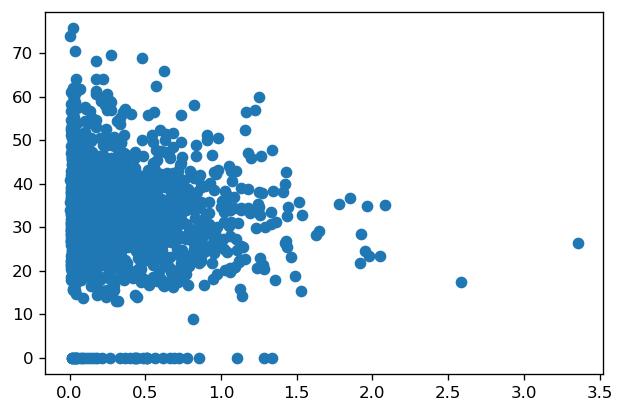

20


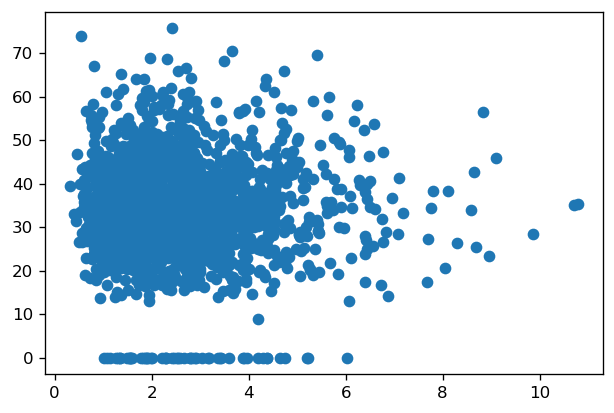

21


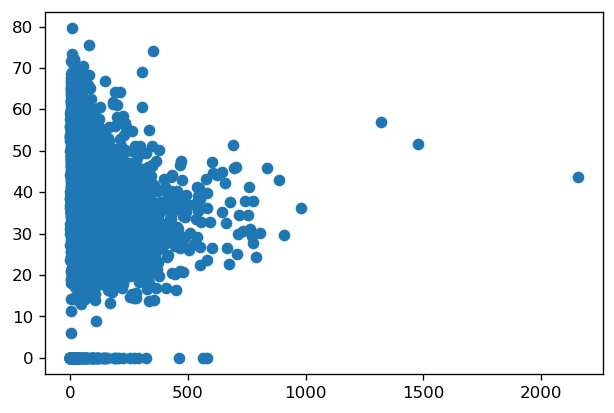

22


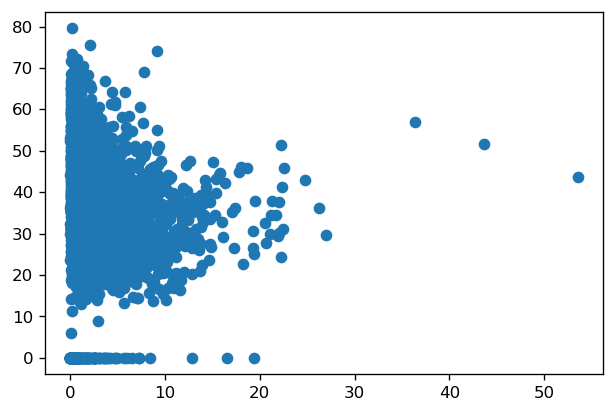

23


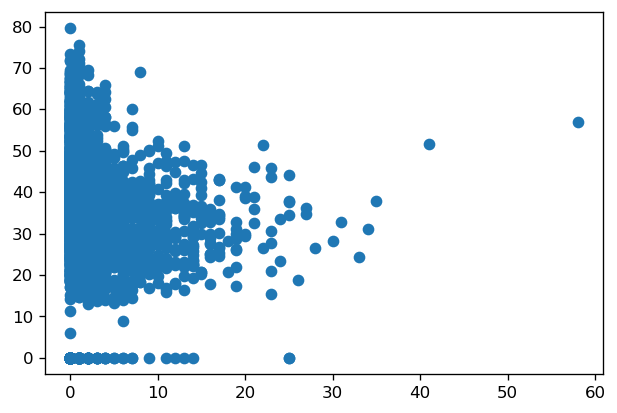

24


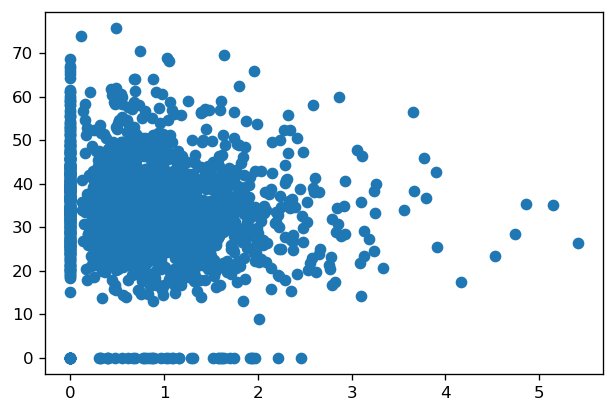

25


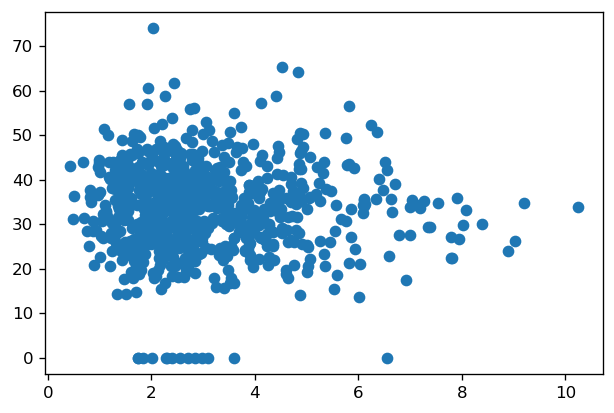

26


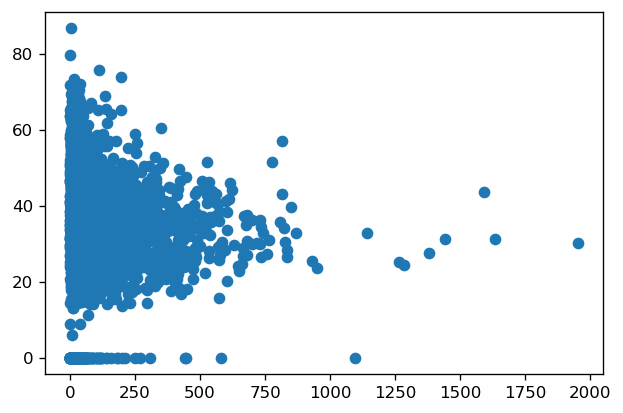

27


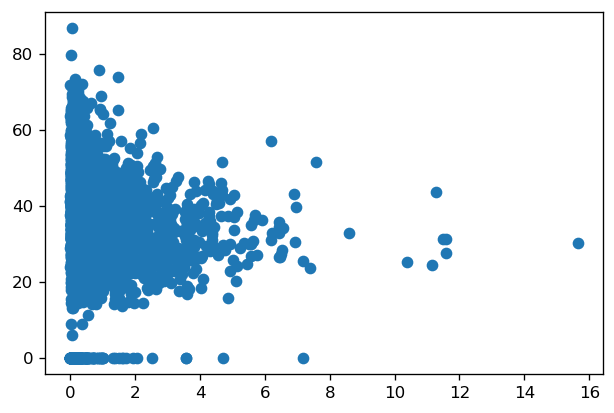

28


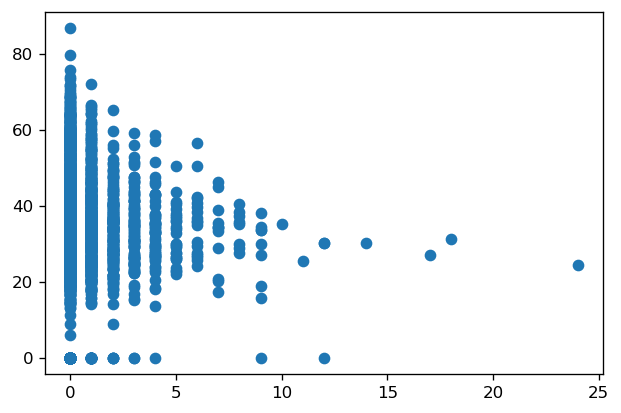

29


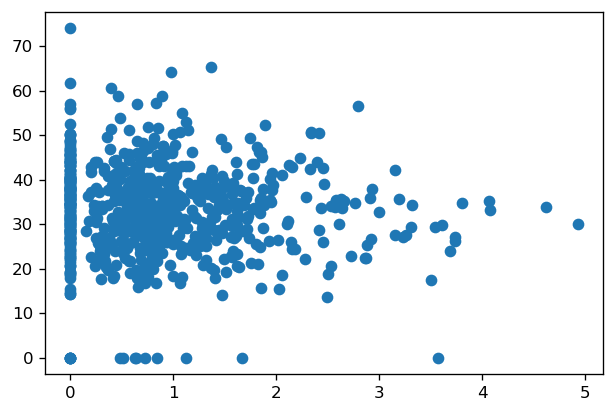

30


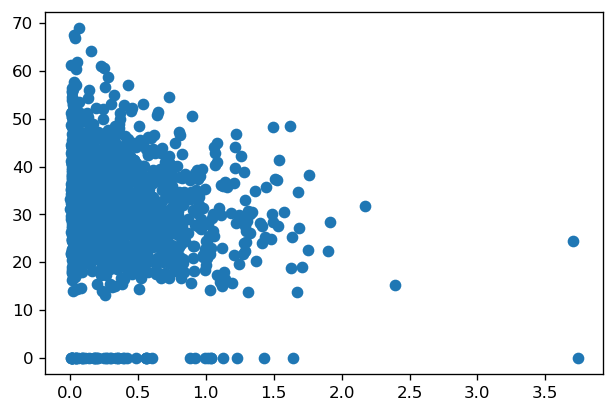

31


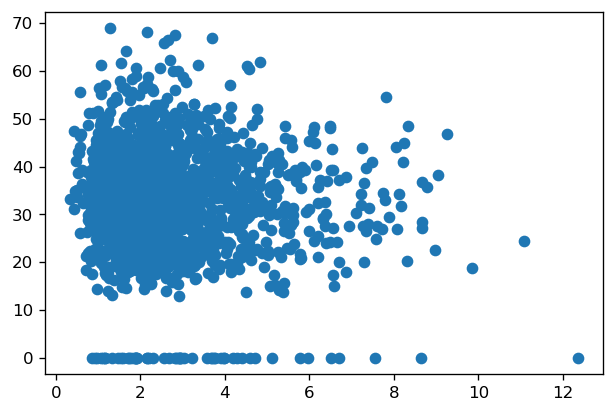

32


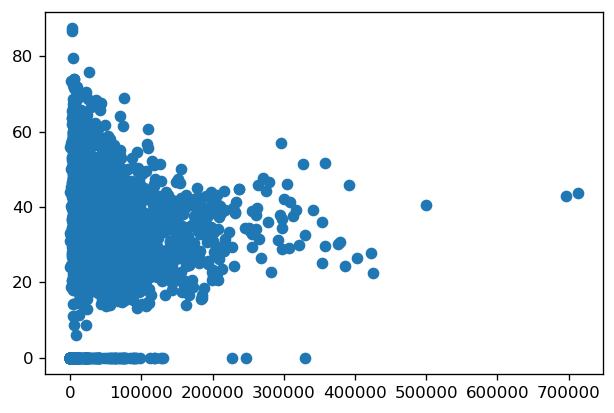

33


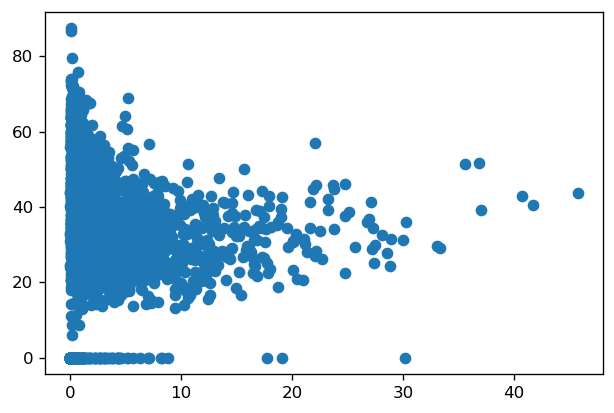

34


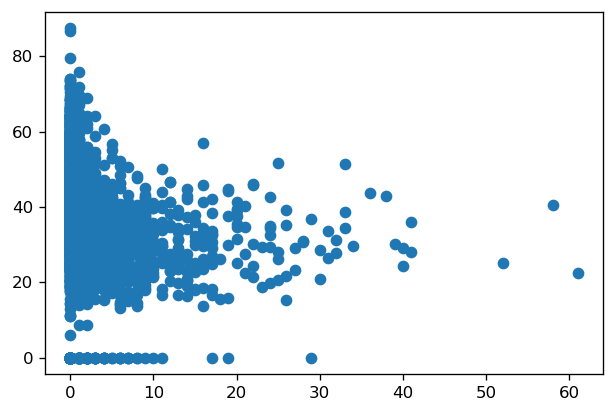

35


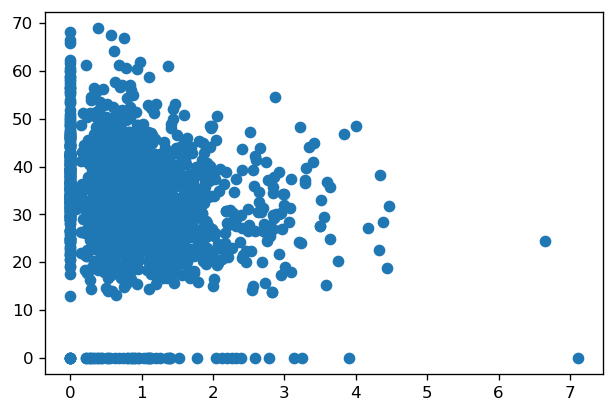

36


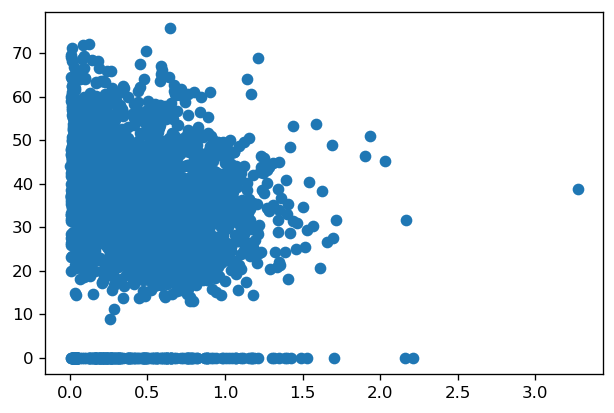

37


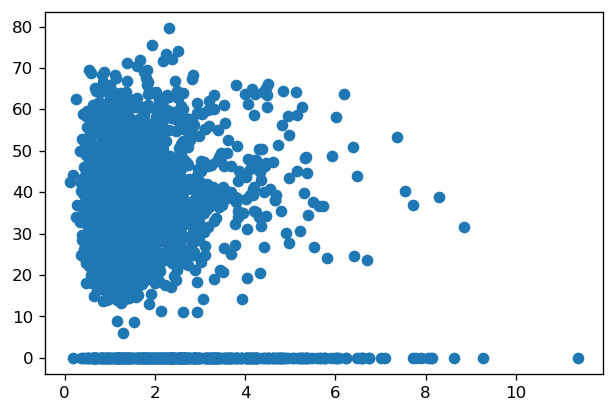

38


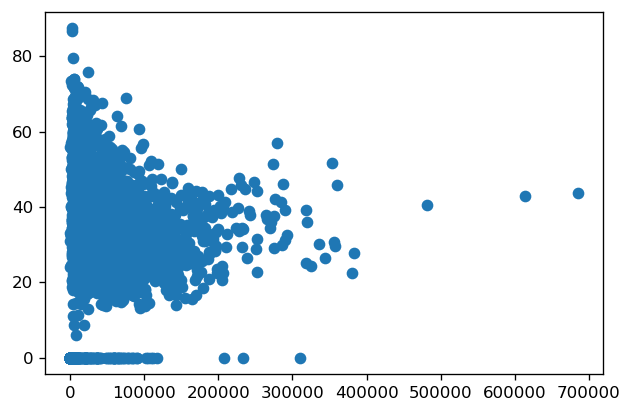

39


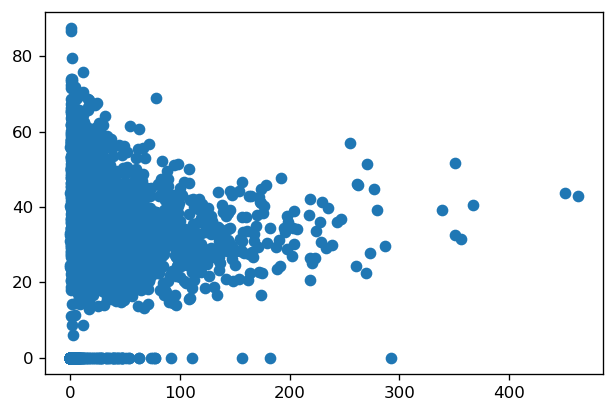

40


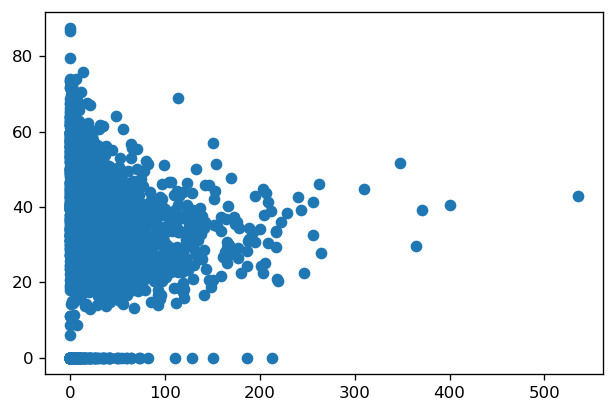

41


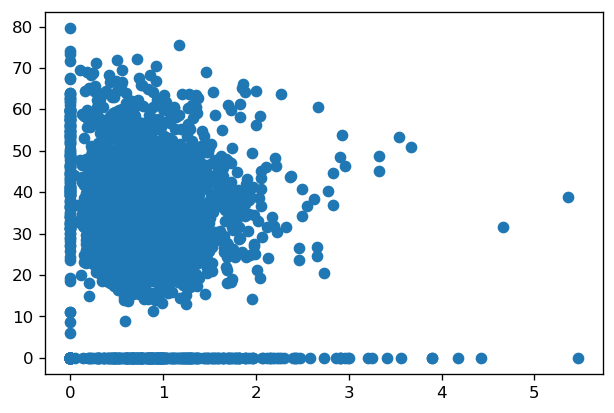

42


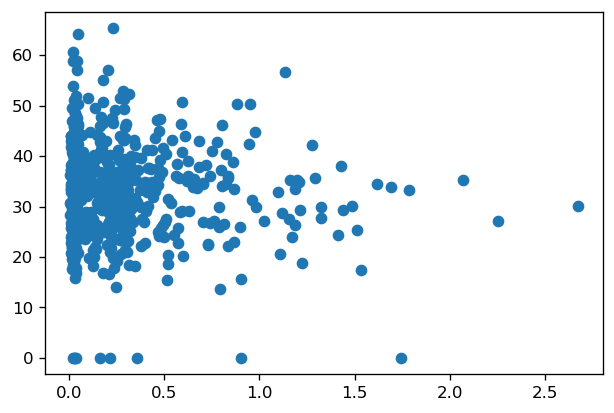

In [36]:
XY = df_Y
for k in df.measure_name.unique():
    dfTemp = df[df.measure_name==k]
    
    # Strip two important columns.
    dfTemp = pd.DataFrame({'id':dfTemp.provider_id,'score_infections_'+str(cnt):dfTemp.score.astype('float')})
    # merge into full set
    full_XY = pd.merge(left=full_XY, right=dfTemp, left_on='id',right_on='id', how='outer')
    # plot
    print(cnt)
    plt.plot(full_XY['score_infections_'+str(cnt)], full_XY.rating, lineStyle='none', marker='o')
    plt.show()
    cnt = cnt + 1

# Save Merged Dataset

In [37]:
full_XY = full_XY.fillna(0)
print(len(full_XY))
full_XY.head()

4569


,id,rating,score_care_1,score_care_2,score_care_4,score_care_5,score_care_7,score_care_9,score_care_10,score_care_11,...,score_infections_33,score_infections_34,score_infections_35,score_infections_36,score_infections_37,score_infections_38,score_infections_39,score_infections_40,score_infections_41,score_infections_42
0,10001,35.547619,255.0,84.0,92.0,86.0,165.0,40.0,80.0,6.0,...,5.692,7.0,1.230,0.459,0.825,99101.0,72.323,45.0,0.622,0.0
1,10005,33.523810,246.0,76.0,98.0,80.0,114.0,22.0,69.0,2.0,...,1.429,2.0,1.400,0.101,0.769,39531.0,12.547,4.0,0.319,0.0
2,10006,22.702381,220.0,64.0,99.0,89.0,136.0,11.0,68.0,2.0,...,3.748,8.0,2.134,0.282,0.756,60269.0,33.617,16.0,0.476,0.0
3,10007,27.555556,138.0,70.0,99.0,54.0,117.0,39.0,79.0,4.0,...,0.039,0.0,0.000,0.000,0.000,2179.0,0.946,0.0,0.000,0.0
4,10011,28.630952,290.0,66.0,78.0,73.0,148.0,52.0,91.0,3.0,...,7.599,4.0,0.526,0.399,0.691,87270.0,96.234,51.0,0.530,0.0


In [38]:
full_XY = full_XY[full_XY.rating!=0]
print(len(full_XY))

2808


In [39]:
# output clean csv
full_XY.to_csv(r'C:\Users\koole\2019FallDataCompetition\full_XY.csv', index=False)